In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
sns.set_theme(style="whitegrid")

In [6]:
data=pd.read_csv("onlinefoods.csv")

In [8]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [44]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


# EDA

<AxesSubplot:title={'center':'Online Food Order Decision based on Age of customer'}, xlabel='Age', ylabel='Count'>

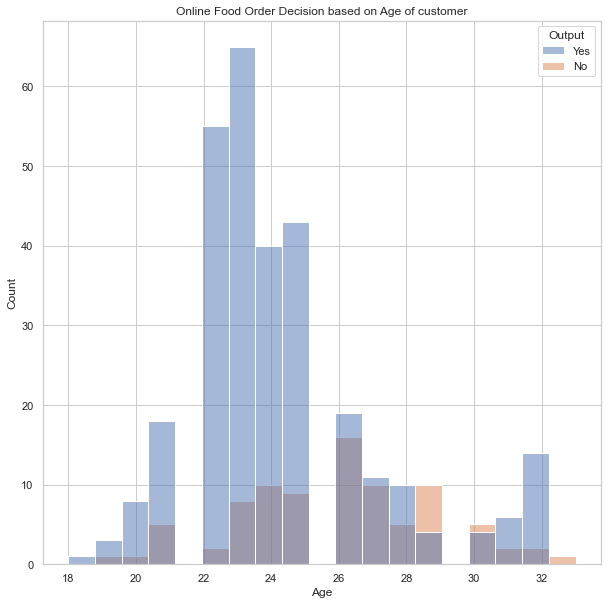

In [76]:
plt.figure(figsize=(10,10))
plt.title("Online Food Order Decision based on Age of customer")
sns.histplot(x='Age',hue='Output',data=data)

We can see that the age group of 22-25 ordered the food often again. It also means this age group is the target of online food delivery companies.

Text(0.5, 1.0, 'Online Food Order Decision based on Family Size')

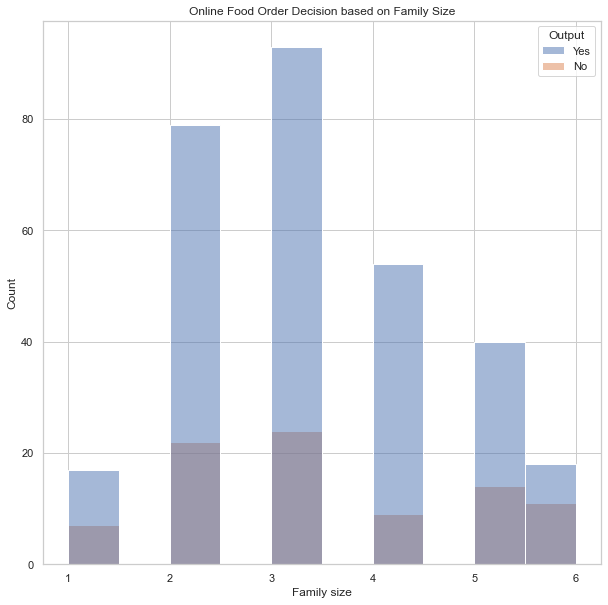

In [19]:
plt.figure(figsize=(10,10))
sns.histplot(x='Family size',hue='Output',data=data)
plt.title("Online Food Order Decision based on Family Size")

According to the graph families with 2 or 3 members are ordering the food often.they can be roommates,couples or a family of three.

# We can create a dataset of all customers who ordered the food again

In [20]:
brought_again_data=data.query("Output=='Yes'")

In [21]:
brought_again_data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


<AxesSubplot:xlabel='Gender', ylabel='count'>

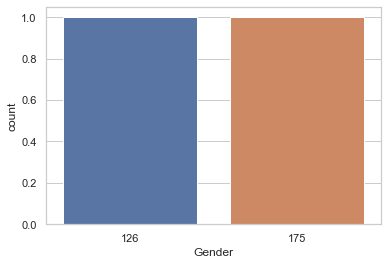

In [23]:
gender=brought_again_data['Gender'].value_counts()
sns.countplot(x=gender,data=data)

In [32]:
gender=brought_again_data['Gender'].value_counts()
label=gender.index
counts=gender.values
colors=['gold','green']
fig=go.Figure(data=[go.Pie(labels=label,values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Male Vs. Female')
fig.update_traces(hoverinfo='label+percent',textinfo='value',textfont_size=30,marker=dict(colors=colors,line=dict(color='black',width=3)))
fig.show()

According to the dataset, male customers are ordering more compared the females.

In [36]:
marital = brought_again_data['Marital Status'].value_counts()
label=marital.index
counts=marital.values
colors=['gold','green']
fig=go.Figure(data=[go.Pie(labels=label,values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Married Vs. Singles')
fig.update_traces(hoverinfo='label+percent',textinfo='value',textfont_size=30,marker=dict(colors=colors,line=dict(color='black',width=3)))
fig.show()

According to the above figure, 76.1% of the frequent customers are singles.

In [43]:
income=brought_again_data['Monthly Income'].value_counts()
labels=income.index
counts=income.values
colors=['gold','green']
fig=go.Figure(data=[go.Pie(labels=labels,values=counts)])
fig.update_layout(title_text='Which Income Group Orders Food Online More')
fig.update_traces(hoverinfo='label+percent',textinfo='value',textfont_size=30,marker=dict(colors=colors,line=dict(color='black',width=3)))
fig.show()

According to the above figure, 54% of the customers don’t fall under any income group. They can be housewives or students.

# Converting the categorical variable into numerical

In [53]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data["Marital Status"] = data["Marital Status"].map({"Married": 2, 
                                                     "Single": 1, 
                                                     "Prefer not to say": 0})
data["Occupation"] = data["Occupation"].map({"Student": 1, 
                                             "Employee": 2, 
                                             "Self Employeed": 3, 
                                             "House wife": 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4, 
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0, 
                                                     "25001 to 50000": 5000, 
                                                     "More than 50000": 7000, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative ": 0})

In [54]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,1,1,0,2,4,12.9766,77.5993,560001,Yes,1,Yes
1,24,0,1,1,10000,1,3,12.9770,77.5773,560009,Yes,1,Yes
2,22,1,1,1,10000,2,3,12.9551,77.6593,560017,Yes,0,Yes
3,22,0,1,1,0,1,6,12.9473,77.5616,560019,Yes,1,Yes
4,22,1,1,1,10000,2,4,12.9850,77.5533,560010,Yes,1,Yes


In [55]:
data.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

# Splitting the training and test data

In [56]:
X = data[['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size','Pin code','Feedback']]
y = data['Output']

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

# Train the Machine Learning model

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
model = RandomForestClassifier()

In [71]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [72]:
print(model.score(X_test, y_test))

0.8717948717948718


# Let's get input about the customerto predict whether the customer will oder the food agin or not

In [74]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))


Enter Customer Details to Predict If the Customer Will Order Again
Enter the Age of the Customer: 20
Enter the Gender of the Customer (1 = Male, 0 = Female): 0
Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): 1
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): 1
Monthly Income: 0
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): 1
Family Size: 1
Pin Code: 612001
Review of the Last Order (1 = Positive, 0 = Negative): 1


In [75]:
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ", model.predict(features))

Finding if the customer will order again:  ['Yes']
